In [1]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))
import thalesians.tsa.neural.tfwrapper as tfwrapper

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.random.normal(size=(100, 5))

In [5]:
y = np.empty((np.shape(x)[0], 3))

In [6]:
y[:,0] = np.exp(x[:,0])

In [7]:
y[:,1] = np.cos(x[:,1]) + np.sin(x[:,2])

In [8]:
y[:,2] = x[:,0] + x[:,1] + x[:,2] + x[:,3] + x[:,4]

In [9]:
n, p = np.shape(x)
q = np.shape(y)[1]

In [10]:
n_train = n // 2
n_test = n - n_train

In [11]:
x_train = x[:n_train,:]
y_train = y[:n_train,:]
x_test = x[n_train:,:]
y_test = y[n_train:,:]

In [12]:
model = tfwrapper.Sequential()

In [13]:
model.add(tfwrapper.Dense(100, input_dim=p, activation='tanh'))
model.add(tfwrapper.Dense(100, activation='tanh'))
model.add(tfwrapper.Dense(q, activation='linear'))

In [14]:
model.compile(loss='mean_squared_error', optimizer='sgd', lr=0.001)

In [15]:
y_train_pred = model.fit(x_train, y_train, epochs=10000)

loss: 0.195759


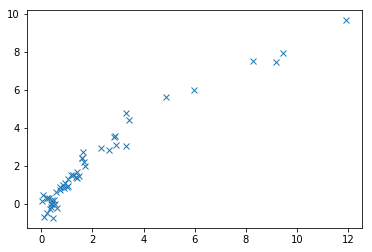

In [16]:
plt.plot(y_train[:,0], y_train_pred[:,0], 'x');

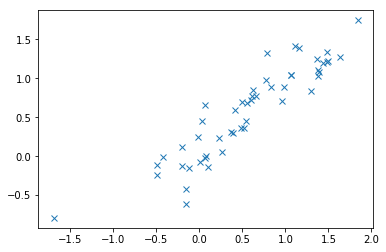

In [17]:
plt.plot(y_train[:,1], y_train_pred[:,1], 'x');

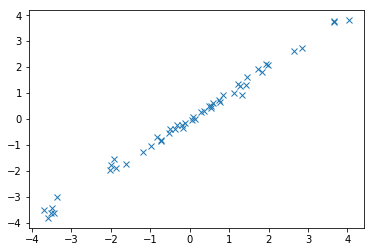

In [18]:
plt.plot(y_train[:,2], y_train_pred[:,2], 'x');

In [19]:
y_test_pred = model.predict(x_test)

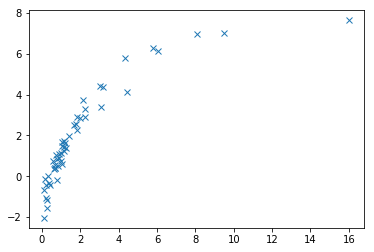

In [20]:
plt.plot(y_test[:,0], y_test_pred[:,0], 'x');

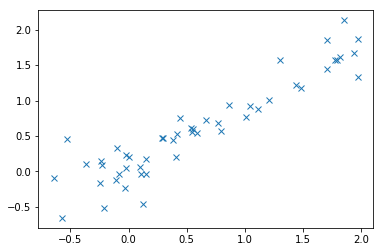

In [21]:
plt.plot(y_test[:,1], y_test_pred[:,1], 'x');

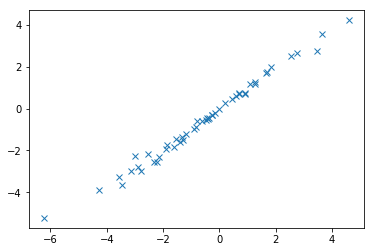

In [22]:
plt.plot(y_test[:,2], y_test_pred[:,2], 'x');